In [103]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [104]:
df=pd.read_csv('/content/row_cleaned.csv')
data=df.loc[:, ~df.columns.isin(['Sno', 'iso_code','country'])]
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

data.to_csv('/content/normalized.csv')

In [105]:
df_min_max_scaled = df.copy()

# apply normalization techniques
for column in df_min_max_scaled.iloc[:, 4:]:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())


df_min_max_scaled.to_csv('/content/min-max-normalized.csv')

In [108]:
def explore(row: float):
  if row >= 0.25:
    return 'high'
  else:
    return 'low'
x=df_min_max_scaled['co2_per_gdp'].tolist()
y=[]
for r in x:
  y.append(explore(r))

df_min_max_scaled['class']=y
print(df_min_max_scaled['class'])
df_min_max_scaled.to_csv('/content/min-max-normalized.csv')

0       high
1       high
2       high
3       high
4       high
        ... 
1123     low
1124     low
1125     low
1126     low
1127     low
Name: class, Length: 1128, dtype: object


In [109]:
classa=df_min_max_scaled.loc[df_min_max_scaled['class']=='high']
Mean=np.mean(classa , axis=0)
standard=np.std(classa, axis=0)
print(Mean)
print(standard)

Sno                                    12833.410180
year                                    1999.371257
co2                                        0.015568
co2_per_capita                             0.321068
trade_co2                                  0.656767
cement_co2                                 0.004552
cement_co2_per_capita                      0.147582
coal_co2                                   0.014551
coal_co2_per_capita                        0.309591
flaring_co2                                0.017731
flaring_co2_per_capita                     0.155522
gas_co2                                    0.020491
gas_co2_per_capita                         0.360103
oil_co2                                    0.015422
oil_co2_per_capita                         0.155358
other_industry_co2                         0.016012
other_co2_per_capita                       0.312527
co2_growth_prct                            0.572554
co2_growth_abs                             0.201578
co2_per_gdp 

In [110]:
classb=df_min_max_scaled.loc[df_min_max_scaled['class']=='low']
Mean1=np.mean(classb , axis=0)
standard1=np.std(classa, axis=0)
print(Mean1)
print(standard1)

Sno                                    13402.173804
year                                    2006.079345
co2                                        0.014518
co2_per_capita                             0.216468
trade_co2                                  0.709810
cement_co2                                 0.009412
cement_co2_per_capita                      0.149529
coal_co2                                   0.012380
coal_co2_per_capita                        0.124426
flaring_co2                                0.012193
flaring_co2_per_capita                     0.068514
gas_co2                                    0.015238
gas_co2_per_capita                         0.285891
oil_co2                                    0.017696
oil_co2_per_capita                         0.178945
other_industry_co2                         0.014950
other_co2_per_capita                       0.241622
co2_growth_prct                            0.585447
co2_growth_abs                             0.203308
co2_per_gdp 

In [111]:
distance=np.linalg.norm(Mean-Mean1)
print(distance)

568.803479482917


In [112]:
np.histogram(df_min_max_scaled['consumption_co2_per_capita'],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],density=True)
m=df_min_max_scaled['consumption_co2_per_capita'].mean()
var=df_min_max_scaled['consumption_co2_per_capita'].var()
print("Mean:",m)
print("Variance:",var)

Mean: 0.16923271842622742
Variance: 0.012082460547207335


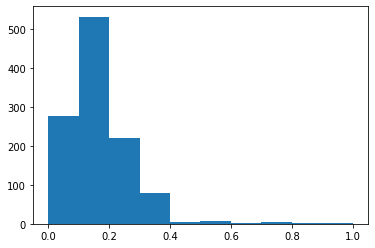

In [113]:
plt.hist(df_min_max_scaled['consumption_co2_per_capita'],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

[1.3778172807043667, 1.0061225232904167, 1.0002035222786314, 1.0000091060481284, 1.000000470810529, 1.0000000263530577, 1.000000001549357, 1.0000000000941849, 1.000000000005866, 1.0000000000003721]


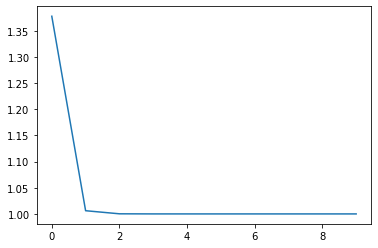

In [114]:
from scipy.spatial import distance
x=df_min_max_scaled.iloc[18,3:-1]
y=df_min_max_scaled.iloc[19,3:-1]
ans=[]
for p in range(1,11):
  ans.append(distance.minkowski(x,y,p))
print(ans)
plt.plot(ans)
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
z=df_min_max_scaled.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(z, df_min_max_scaled['class'], test_size=0.3)
print(X_test)

        Sno iso_code        country  year       co2  co2_per_capita  \
737   17695      NOR         Norway  2015  0.001052        0.237654   
1026  23582      TUR         Turkey  2010  0.008387        0.093663   
158    3756      BGR       Bulgaria  2003  0.001186        0.162893   
453   11017      HUN        Hungary  2008  0.001369        0.138656   
144    3484      BRA         Brazil  2018  0.013008        0.027360   
...     ...      ...            ...   ...       ...             ...   
219    5306      HRV        Croatia  2006  0.000450        0.127562   
662   14228      LUX     Luxembourg  2014  0.000075        0.529312   
45     1795      AUT        Austria  2006  0.001903        0.253790   
131    3471      BRA         Brazil  2005  0.009752        0.015941   
1110  24648      USA  United States  2007  0.167142        0.615752   

      trade_co2  cement_co2  cement_co2_per_capita  coal_co2  ...  \
737    0.684237    0.000428               0.091295  0.000258  ...   
1026   0.

In [116]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
x=X_train.iloc[:,3:-1]
neigh.fit(x, y_train)

KNeighborsClassifier(n_neighbors=3)

In [117]:
x1=X_test.iloc[:,3:-1]
s1=neigh.score(x, y_train)
s2=neigh.score(x1, y_test)
print(s1)
print(s2)

0.9150823827629911
0.8643067846607669


In [118]:
neigh.predict(X_test.iloc[30:31,3:-1])


array(['high'], dtype=object)

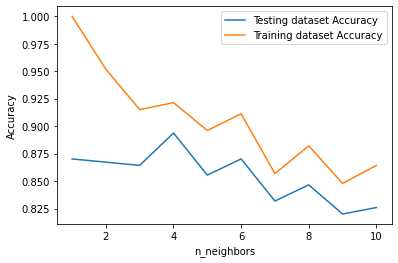

In [119]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    neigh = KNeighborsClassifier(n_neighbors=k)
    x=X_train.iloc[:,3:-1]
    neigh.fit(x, y_train)
      
    train_accuracy[i] = neigh.score(X_train.iloc[:,3:-1], y_train)
    test_accuracy[i] = neigh.score(X_test.iloc[:,3:-1], y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()